# Import statements

In [794]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import random


#takes care that out plots are shown in this notebook only
%matplotlib inline 

#takes care that the tree that we create is easy to read and understand
from pprint import pprint

# Load and Prepare Data

##### format of the data
1. last column of the data frame must contain the label and it must also be called "label"
2.  there should be no missing values in the dataframe

In [795]:
df = pd.read_csv("iris.csv", header = None)
df.columns = ['sl', 'sw', 'pl', 'pw', 'flower_type']


In [796]:
df.head()

,sl,sw,pl,pw,flower_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [797]:
df = df.rename(columns = {"flower_type" : "label"})

In [798]:
df.head()

,sl,sw,pl,pw,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# train-test-split function

In [799]:
def train_test_split(df, test_size):
    #We'll check if the test_size is in proportion or a number

    if(isinstance(test_size, float)):
        test_size = test_size * len(df)
        test_size = round(test_size)

    #it creates a list of all the indexes as we will split based on random indexes. we created this list because
    #the sample function below can operate on lists only.
    indices = df.index.tolist()

    #we need to select random indices from it.
    #k is the number of elements that we want to sample from this population.
    test_indices = random.sample(population = indices, k = test_size)

    test_df = df.loc[test_indices]

    train_df = df.drop(test_indices)
    
    
    return train_df, test_df

In [800]:
#random.seed() makes sure that we get the same random numbers when we run the function
# random.seed(0)
train_df, test_df = train_test_split(df, test_size = 20)

# Helper functions

In [801]:
data = train_df.values
data[:5]

array([[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa']], dtype=object)

### Data pure ? 
#### it checks if a certain partition of our data contains just one class(pure) or several classes(not pure)

In [802]:
def check_purity(data):
    
    label_column = data[:,-1]

    unique_classes = np.unique(label_column)

    if(len(unique_classes) == 1):
        return True
    else:
        return False
    

In [803]:
# check_purity(train_df[train_df.pw <= 0.8].values)

### Classify

In [804]:
def classify_data(data):
    #check_purity function already ran when this function runs.

    label_column = data[:,-1]
    
    ## this can be enough if the data is pure.
    # classification = label_column[0]

    
    # But there are some cases where we want to classify our data 
    #before it is pure yet. For example, we want a minimum number of data points. And if dont have them, we will classify that data.
    #based on either majority or random basis.
    
    #HERE WE ARE CLASSIFYING THEM BASED UPON THE MAJORITY ELEMENT.
    
    #to see which class appears the most, 
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts = True)

    #to get index of largest value of count
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    #returns the class that 
    return classification

### Potential splits ?

In [805]:
train_df.head()

,sl,sw,pl,pw,label
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [814]:
def get_potential_splits(data):
    
    #keys will be the indices of the columns

    potential_splits = {}

    #we just need the number of columns, so we write underscore'_' for row part

    _, n_columns = data.shape

    #to iterate over the columns, we write this loop and n_columns - 1 because last column is for label
    for column_index in range(n_columns - 1):

        #we will create one entry in our potential split dictionary and it will be an empty list
        #in which we will append our potential splits
        potential_splits[column_index] = []

        #we will consider every line between any two values as potential splits
        # so, to get those potential splits, we will need first of all, all the values for that particular feature (or column)
        values = data[:, column_index]

        unique_values = np.unique(values)

#         #lets print those values, for example, in case the column values = 3, 
#that is the petal_width column

# #         if column_index == 3:
# #             print(unique_values)

#         #now to calculate those potential splits, we're going to iterate over unique_values array
#         #then we'll take the respective element, add the previous element to that, then divide the sum by 2 to get the value 
#         #that lies exactly in between.
        
#         #if feature is continuous
        
#         type_of_feature = FEATURE_TYPES[column_index]
#         if type_of_feature == "continuous":
#             if len(unique_values) > 1:
#                 potential_splits[column_index] = []
#                 for index in range(len(unique_values)):
#                     if(index != 0):
#                         current_value = unique_values[index]
#                         previous_value = unique_values[index - 1]

#                         potential_split = (current_value + previous_value) / 2

#                         #then we append this potential_split to the list that we created in the beginning.

#                         potential_splits[column_index].append(potential_split)
#         #not continuous
#         elif len(unique_values) > 1:

        potential_splits[column_index] = unique_values
            
            
            
    return potential_splits

In [815]:
potential_splits = get_potential_splits(train_df.values)

### checking if this potential split makes any sense. therefore, we'll create a scatter plot using seaborn


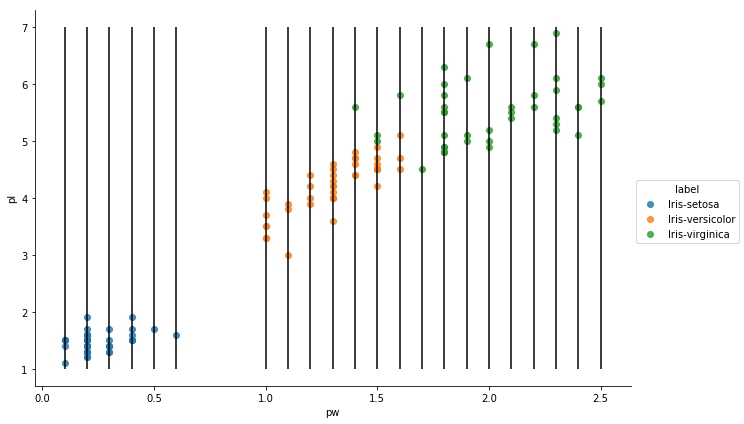

In [816]:
sns.lmplot(data = train_df, x = "pw", y = "pl", hue = "label", 
           fit_reg = False, size = 6, aspect = 1.5)

# potential split based upon column number 3, that is pw
plt.vlines(x = potential_splits[3], ymin = 1, ymax = 7)

# potential split based upon column number 2
# plt.hlines(y = potential_splits[2], xmin = 0, xmax = 2.5)

### split data

In [820]:
def split_data(data, split_column, split_value):
    split_column_values = data[:, split_column]

    #to see which values are below and we'll use boolean indexing
    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values > split_value]
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
        
    return data_below, data_above
    #first numpy2d array should contain all the datapoints tht are below the split and vice versa
    

In [821]:
#just taking
# split_column = 3

# split_value = 0.8

In [827]:
data_below, data_above = split_data(train_df.values, split_column = 1, split_value = "male")

In [828]:
# #converting our data in a df, as data argument in lmplot takes in a dataframe only
# plotting_df = pd.DataFrame(data, columns = df.columns)

# sns.lmplot(data = plotting_df, x = "pw", y = "pl", fit_reg = False, size = 6, aspect = 1.5)

# plt.vlines(x = split_value, ymin = 1, ymax = 7)
# #adding limit on x
# plt.xlim(0, 2.6)


np.unique(data_above[:, 1])

array([2.0, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3,
       3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.4], dtype=object)

### Lowest Overall Entropy

In [829]:
def calculate_entropy(data):
    #Entropy = 
    #SUM (pi * (-log base2 (pi)))

    label_column = data[:, -1]

    _, counts = np.unique(label_column, return_counts = True)

    probabilities = counts / counts.sum()

    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

In [830]:
calculate_entropy(data_below)

0

In [831]:
def calculate_overall_entropy(data_below, data_above):
    # Overall entropy = sum(pj * entropy)

    #we need to know the p values, and for p values we need how many data points are there in our data

    n_data_points = len(data_below) + len(data_above)

    p_data_below = len(data_below) / n_data_points

    p_data_above = len(data_above) / n_data_points

    overall_entropy = ((p_data_below) * calculate_entropy(data_below)
                       + p_data_above * calculate_entropy(data_above))

    return overall_entropy

In [832]:
calculate_overall_entropy(data_below, data_above)

1.5838446380729325

In [728]:
def determine_best_split(data, potential_splits):

    #create a variable and set it to arbitrary high value 
    overall_entropy = 999

    #then the function should loop over all the potential splits
    #calculate the overall entropy that will be the result of particular split
    #and then, if the overall entropy of that particular split is lower
    #than our intial overall entropy, then we are gonna consider the parameters of that split
    #into our best fit column and best split value 


    for column_index in potential_splits:
        
#         print(COLUMN_HEADERS[column_index], "-", len(np.unique(data[:, column_index])))
        
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column = column_index, 
                                                split_value = value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [729]:
potential_splits = get_potential_splits(data)

In [730]:
determine_best_split(data, potential_splits)

(1, 'male')

# Decision Tree Algorithm

### Representation of the Decision Tree

In [731]:
#using a dictionary with only 1 key. 
#the key is the question that we ask

example_tree = {"pw <= 0.8": ["Iris-setosa", 
              {"pw <= 1.65": [{"pl <= 4.9": ["Iris-versicolor",
                                            "Iris-verginica"]},
                             "Iris-virginica"]}]}

### Determine type of Feature

In [732]:
def determine_type_of_feature(df):
    feature_types = []
    n_unique_values_threshold = 15 #because continuous features contain a large number of values. 
    
    for column in df.columns:
        unique_values = df[column].unique()
        
        example_value = unique_values[0]
        
        if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_threshold):
            feature_types.append("categorical")
        else:
            feature_types.append("continuous")
    
    
    return feature_types #categorical or continuous


In [733]:
df.head()   #if there is a string in a feature, then the feature is categorical feature
#catergorical feature can also have an integer.
#if feature has float, then it is continuous.

# How to determine the feature is categorical or continuous ?
# if number, then we have to see how many unique values there are in that column.
# continuous features can take infinite values.
# So, generally, continuous features will have many more unique values than categorical features.

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [734]:
feature_types = determine_type_of_feature(df)
i = 0
for column in df.columns:
    print(column, "-", feature_types[i])
    i += 1

Pclass - categorical
Sex - categorical
Age - continuous
SibSp - categorical
Parch - categorical
Fare - continuous
Embarked - categorical
label - categorical


In [833]:
FEATURE_TYPES

['categorical',
 'categorical',
 'continuous',
 'categorical',
 'categorical',
 'continuous',
 'categorical',
 'categorical']

### Algorithm

In [736]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'label'], dtype='object')

In [767]:
#we wont pass in the numpy 2d array instead we'll pass in dataframe

#min_samples is pruning
def decision_tree_algorithm(df, counter = 0, min_samples = 2, max_depth = 5):
    # we need to convert this dataframe into a numpy 2d array in first call of the function
    #this is a recursive function
    
    #data preparation part
    if counter == 0:
        #making column_header as a global variable
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df
        
    #base case 1
    if check_purity(data) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        return classification
    
    
    # recursive part
    else:
        counter += 1
        
        #helper functions
        potential_splits = get_potential_splits(data)
        
#         if len(potential_splits) == 0:
#             classification = classify_data(data)
#             return classification
        
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification
        
        
        #now we can think about how are we going to build the tree
        #instantiate sub-tree
        
        #determine questoin
        feature_name = COLUMN_HEADERS[split_column]
        
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
        
            question = "{} <= {}".format(feature_name, split_value)
        
        #feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
            
        
        #instantiate sub-tree
        sub_tree = {question: []}
        
        #find answers (recursion part)
        
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
            
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [768]:
tree = decision_tree_algorithm(train_df, max_depth = 3)
pprint(tree, width = 50)

{'Sex = male': [{'Fare <= 15.1': [{'Age <= 6.0': [1,
                                                  0]},
                                  0]},
                {'Pclass = 3': [{'Fare <= 23.25': [1,
                                                   0]},
                                1]}]}


# Classification

In [769]:
example = test_df.iloc[0]
example

Pclass                          1
Sex                        female
Age                            50
SibSp                           0
Parch                           1
Fare                      247.521
Embarked                        C
label                           1
classification                  1
classification_correct       True
Name: 299, dtype: object

In [770]:
def classify_example(example, tree):
    # it has a base case and a recursion function
    
    #base case is if the answer to our question is a class, that is, it it not a dictionary
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    # ask question
    
    if comparison_operator == "<=":
    
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
            
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    #base case
    if not isinstance(answer, dict):
        return answer

    #recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [771]:
classify_example(example, tree)

1

# Accuracy

In [837]:
def calculate_accuracy(df, tree):
    # we create 2 columns of the df dataframe, 1st for classification, 
    # 2nd for if the classification is correct or not. we can use it to calculate the actual accuracy as well
    # we can see where there is misclassification and if yes, why ?
    
    df["classification"] = df.apply(classify_example, axis = 1, args = (tree, ))
    # it the classification is correct ot not
    df["classification_correct"] = df.classification == df.label
    
    #calculating mean of the classification_correct column for accuracy
    accuracy = df.classification_correct.mean()
    
    return accuracy

In [839]:
calculate_accuracy(test_df, tree)

In [774]:
pprint(tree)

{'Sex = male': [{'Fare <= 15.1': [{'Age <= 6.0': [1, 0]}, 0]},
                {'Pclass = 3': [{'Fare <= 23.25': [1, 0]}, 1]}]}


In [775]:
train_df, test_df = train_test_split(df, test_size = 0.2)
tree = decision_tree_algorithm(train_df, max_depth = 3)
accuracy = calculate_accuracy(test_df, tree)

pprint(tree)
print(accuracy)

{'Sex = male': [{'Fare <= 15.05': [{'Age <= 12.0': [1, 0]}, 0]},
                {'Pclass = 3': [{'Fare <= 24.15': [1, 0]}, 1]}]}
0.820224719101


In [776]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


# So far, our algorithm is only capable of handling continuous features.. Now, we will handle categorical features as well.

### In categorical data, non-numeric data, we convert the strings into numbers before putting them into numbers



# Using Titanic dataset for this 

### Prepare and Load data

In [777]:
df = pd.read_csv("Titanic.csv")
df['label'] = df.Survived
df = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

#handling missing values

median_age = df.Age.median()
mode_embarked = df.Embarked.mode()[0]

df = df.fillna({"Age": median_age, "Embarked": mode_embarked})

In [778]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


# Decision Tree Algorithm

In [785]:
train_df, test_df = train_test_split(df, test_size = 0.2)
tree = decision_tree_algorithm(train_df, max_depth = 3)
accuracy = calculate_accuracy(test_df, tree)

pprint(tree, width = 50)

print(accuracy)

{'Sex = male': [{'Age <= 6.0': [{'SibSp = 1': [1,
                                               0]},
                                0]},
                {'Pclass = 3': [{'Fare <= 23.25': [1,
                                                   0]},
                                1]}]}
0.825842696629


In [780]:
# How can we see the difference between continuous and categorical features is 
#instead of asking if a certain feature is smaller or equal to a certain value, 
# we are going to ask if the certain feature is equal to a value

